<a href="https://colab.research.google.com/github/jllemusc/Finance/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Description: This program uses the three moving average crossover strategy to dermine when to buy and sell stock**

In [159]:
!pip3 install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
yf.pdr_override() 
import datetime as dt 
from dateutil.relativedelta import relativedelta
plt.style.use('fivethirtyeight')



Load the data

In [160]:
msft = yf.Ticker("CARG")
hist = msft.history(period="90d")['Close']

Show the data only two values


In [161]:
hist[-2:]

Date
2021-10-21    34.400002
2021-10-22    33.889999
Name: Close, dtype: float64

Visually see the data

<function matplotlib.pyplot.show>

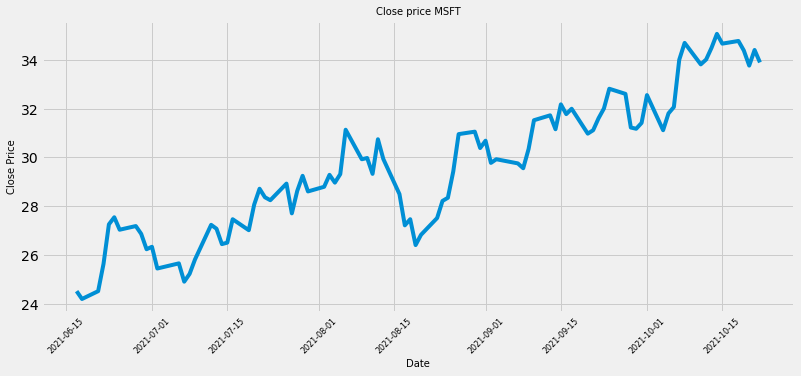

In [162]:
plt.figure(figsize=(12,5))
plt.title('Close price MSFT',fontsize = 10)
plt.plot(hist)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)
plt.xticks(rotation=45, fontsize = 8)
plt.show

Calculate the three moving averages,
Calculate the short / fast exponential moving average

In [163]:
#short short/fast exponential moving average
ShortEMA = hist.ewm(span=5,adjust=False).mean()
# Middle/Medium exponential moving average
MiddleEMA = hist.ewm(span=21,adjust=False).mean()
# long/slow exponential moving average
LongEMA = hist.ewm(span=63,adjust=False).mean()

Visualize the graph

<function matplotlib.pyplot.show>

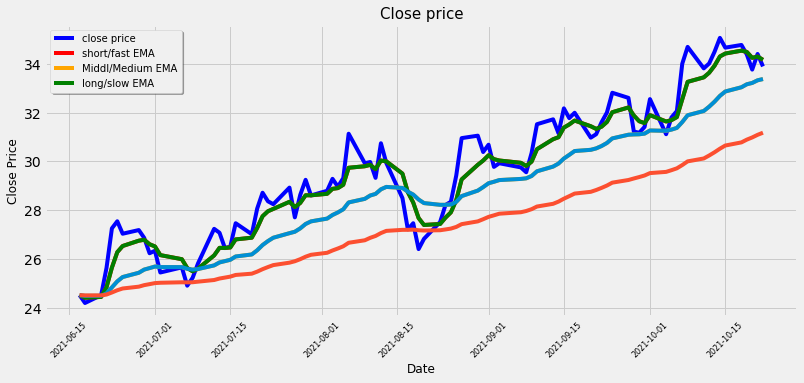

In [164]:
plt.figure(figsize=(12,5))
plt.title('Close price',fontsize = 15)
plt.plot(hist, label = 'close price', color='blue')
plt.plot(ShortEMA, label = 'short/fast EMA', color='red')
plt.plot(MiddleEMA, label = 'Middl/Medium EMA', color='orange')
plt.plot(ShortEMA, label =  'long/slow EMA', color='green')
plt.legend(loc='upper left', shadow=True,fontsize = 10)
plt.plot(MiddleEMA)
plt.plot(LongEMA)

plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.show

Add the information to the a new dataframe

In [165]:
hist1 = pd.DataFrame(hist)

In [166]:
hist1['Short']= ShortEMA
hist1['Middle']= MiddleEMA
hist1['Long']= LongEMA

In [167]:
hist1.head(2)

,Close,Short,Middle,Long
Date,,,,
2021-06-17,24.510000,24.510000,24.510000,24.51
2021-06-18,24.190001,24.403334,24.480909,24.50


Create the function to buy and sell the stock


In [168]:
def buy_sell_function(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data ['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data ['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return (buy_list, sell_list)



Add the buy and sell signals to the data set

In [169]:
hist1['Buy'] = buy_sell_function(hist1)[0]
hist1['Sell'] = buy_sell_function(hist1)[1]

Check visually in the graphic

<function matplotlib.pyplot.show>

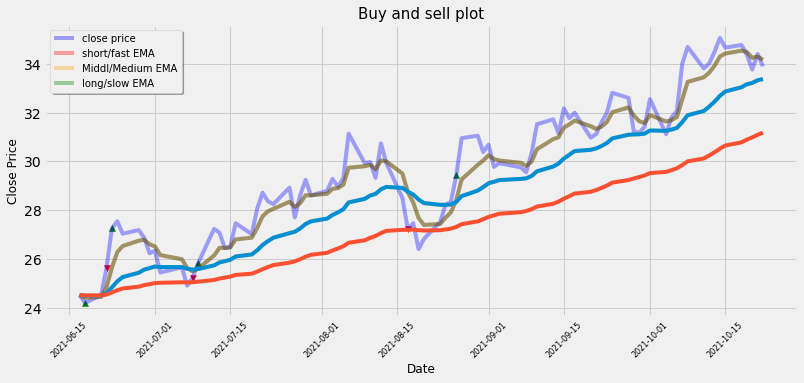

In [170]:
plt.figure(figsize=(12,5))
plt.title('Buy and sell plot',fontsize = 15)
plt.plot(hist, label = 'close price', color='blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'short/fast EMA', color='red', alpha = 0.35)
plt.plot(MiddleEMA, label = 'Middl/Medium EMA', color='orange', alpha = 0.35)
plt.plot(ShortEMA, label =  'long/slow EMA', color='green', alpha = 0.35)
plt.legend(loc='upper left', shadow=True,fontsize = 10)
plt.plot(MiddleEMA)
plt.plot(LongEMA)
plt.scatter(hist1.index,hist1['Buy'], color = 'green', marker = '^', alpha= 1)
plt.scatter(hist1.index,hist1['Sell'], color = 'red', marker = 'v', alpha= 1)
plt.xticks(rotation=45, fontsize = 8)
plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.show